In [49]:
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [50]:
# Load the Excel file
file_path = r'C:\Users\fpt\Downloads\Coding\RFM AW Project\AdventureWorks Sales.xlsx'
sheet_name = 'Sales_data'  

df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')

In [51]:
df.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,6074.982,0,1898.0944,5694.2832,6074.982
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.994,2039.994,0,1912.1544,1912.1544,2039.994
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.994,2039.994,0,1912.1544,1912.1544,2039.994


In [52]:
df.describe()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
count,1.212530e+05,121253.000000,121253.000000,121253.000000,1.212530e+05,1.212530e+05,1.191400e+05,121253.000000,121253.000000,121253.000000,121253.000000,121253.0,121253.000000,121253.000000,121253.000000
mean,5.782642e+07,170.043430,9384.833868,424.884094,2.019158e+07,2.019183e+07,2.019159e+07,5.410035,2.266138,465.180515,909.971564,0.0,362.643598,802.107230,905.621091
std,9.009990e+06,224.536697,10171.582167,116.978898,7.981850e+03,8.021172e+03,7.990125e+03,2.835858,2.491806,752.041893,1705.565586,0.0,541.688873,1660.416044,1693.746343
min,4.365900e+07,-1.000000,-1.000000,212.000000,2.017070e+07,2.017071e+07,2.017071e+07,1.000000,1.000000,1.328200,1.374000,0.0,0.856500,0.856500,1.374000
25%,4.987905e+07,-1.000000,-1.000000,339.000000,2.019041e+07,2.019042e+07,2.019041e+07,4.000000,1.000000,21.490000,24.990000,0.0,9.159300,10.842300,24.990000
50%,5.702800e+07,3.000000,-1.000000,470.000000,2.019101e+07,2.019102e+07,2.019101e+07,6.000000,1.000000,49.990000,134.982000,0.0,38.492300,98.983600,134.982000
75%,6.549000e+07,327.000000,18116.000000,528.000000,2.020022e+07,2.020030e+07,2.020022e+07,8.000000,3.000000,602.346000,1120.490000,0.0,486.706600,999.259500,1120.490000
max,7.512300e+07,701.000000,29483.000000,606.000000,2.020062e+07,2.020062e+07,2.020062e+07,10.000000,44.000000,3578.270000,30992.910000,0.0,2171.294200,38530.385400,27893.619000


In [53]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Columns: 15 entries, SalesOrderLineKey to Sales Amount
dtypes: float64(6), int64(9)
memory usage: 13.9 MB


In [54]:
df.dtypes

SalesOrderLineKey            int64
ResellerKey                  int64
CustomerKey                  int64
ProductKey                   int64
OrderDateKey                 int64
DueDateKey                   int64
ShipDateKey                float64
SalesTerritoryKey            int64
Order Quantity               int64
Unit Price                 float64
Extended Amount            float64
Unit Price Discount Pct      int64
Product Standard Cost      float64
Total Product Cost         float64
Sales Amount               float64
dtype: object

In [55]:
# Null values checking
df_check = df.isnull()
for column in df_check.isnull().columns.to_list():
    print(df_check[column].value_counts())
    print("")

SalesOrderLineKey
False    121253
Name: count, dtype: int64

ResellerKey
False    121253
Name: count, dtype: int64

CustomerKey
False    121253
Name: count, dtype: int64

ProductKey
False    121253
Name: count, dtype: int64

OrderDateKey
False    121253
Name: count, dtype: int64

DueDateKey
False    121253
Name: count, dtype: int64

ShipDateKey
False    119140
True       2113
Name: count, dtype: int64

SalesTerritoryKey
False    121253
Name: count, dtype: int64

Order Quantity
False    121253
Name: count, dtype: int64

Unit Price
False    121253
Name: count, dtype: int64

Extended Amount
False    121253
Name: count, dtype: int64

Unit Price Discount Pct
False    121253
Name: count, dtype: int64

Product Standard Cost
False    121253
Name: count, dtype: int64

Total Product Cost
False    121253
Name: count, dtype: int64

Sales Amount
False    121253
Name: count, dtype: int64



In [56]:
df_check_na = df.isna()
for column in df_check_na.isna().columns.to_list():
    print(df_check_na[column].value_counts())
    print("")

SalesOrderLineKey
False    121253
Name: count, dtype: int64

ResellerKey
False    121253
Name: count, dtype: int64

CustomerKey
False    121253
Name: count, dtype: int64

ProductKey
False    121253
Name: count, dtype: int64

OrderDateKey
False    121253
Name: count, dtype: int64

DueDateKey
False    121253
Name: count, dtype: int64

ShipDateKey
False    119140
True       2113
Name: count, dtype: int64

SalesTerritoryKey
False    121253
Name: count, dtype: int64

Order Quantity
False    121253
Name: count, dtype: int64

Unit Price
False    121253
Name: count, dtype: int64

Extended Amount
False    121253
Name: count, dtype: int64

Unit Price Discount Pct
False    121253
Name: count, dtype: int64

Product Standard Cost
False    121253
Name: count, dtype: int64

Total Product Cost
False    121253
Name: count, dtype: int64

Sales Amount
False    121253
Name: count, dtype: int64



In [57]:
# Drop irrelevant columns
columns_to_drop = [
    'SalesOrderLineKey', 'ResellerKey', 'ProductKey', 'DueDateKey', 'ShipDateKey', 
    'SalesTerritoryKey', 'Order Quantity', 'Unit Price', 'Extended Amount', 
    'Unit Price Discount Pct', 'Product Standard Cost', 'Total Product Cost'
]

df = df.drop(columns=columns_to_drop, axis = 1)

df

,CustomerKey,OrderDateKey,Sales Amount
0,-1,20170702,2024.994
1,-1,20170702,6074.982
2,-1,20170702,2024.994
3,-1,20170702,2039.994
4,-1,20170702,2039.994
...,...,...,...
121248,15868,20200615,21.980
121249,15868,20200615,8.990
121250,18759,20200615,21.980
121251,18759,20200615,159.000


In [58]:
# Data consistency for Data Columns
df['OrderDateKey'] = pd.to_datetime(df['OrderDateKey'], format = '%Y%m%d')

In [77]:
# RFM Model 
reference_date = datetime(2023, 9, 19)

rfm = df.groupby('CustomerKey').agg(
    recency=('OrderDateKey', lambda x: (reference_date - x.max()).days),
    frequency=('OrderDateKey', 'nunique'),
    monetary=('Sales Amount', 'sum')
).reset_index()
rfm = rfm.drop(df[df['CustomerKey'] == -1].index)

In [80]:
# Normalize each of the columns individually
rfm['Recency_scaled'] = scaler.fit_transform(rfm[['recency']])
rfm['Frequency_scaled'] = scaler.fit_transform(rfm[['frequency']])
rfm['Monetary_scaled'] = scaler.fit_transform(rfm[['monetary']])

# Function to calculate WCSS for different values of K (1 to 10)
def calculate_wcss(data_scaled):
    wcss = []
    for i in range(1, 11):  # Trying 1 to 10 clusters
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)  # WCSS is the inertia (within-cluster sum of squares)
    return wcss
# Calculate WCSS for each of the scaled columns (Recency, Frequency, Monetary)
wcss_r = calculate_wcss(rfm[['Recency_scaled']])
wcss_f = calculate_wcss(rfm[['Frequency_scaled']])
wcss_m = calculate_wcss(rfm[['Monetary_scaled']])

C:\Users\fpt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fpt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fpt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fpt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

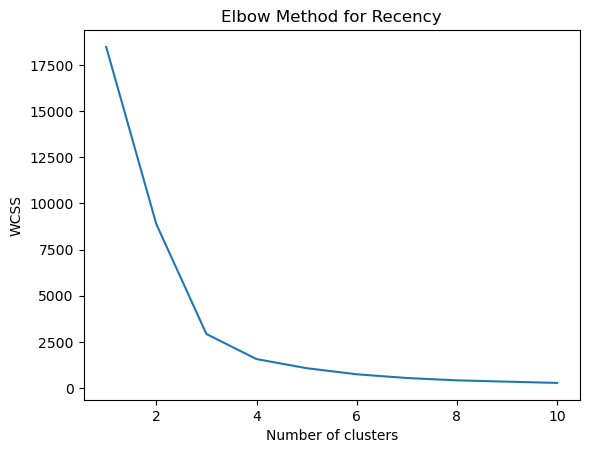

In [81]:
# Plot the Elbow Method for Recency
plt.plot(range(1, 11), wcss_r)
plt.title('Elbow Method for Recency')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# 3 is the optimal cluster number

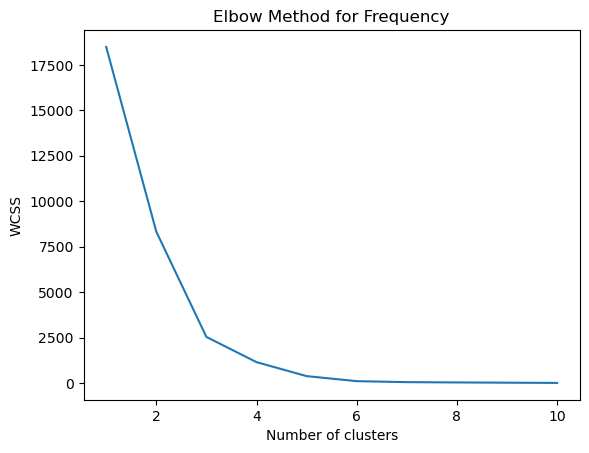

In [82]:
# Plot the Elbow Method for Frequency
plt.plot(range(1, 11), wcss_f)
plt.title('Elbow Method for Frequency')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# 3 is the optimal cluster number

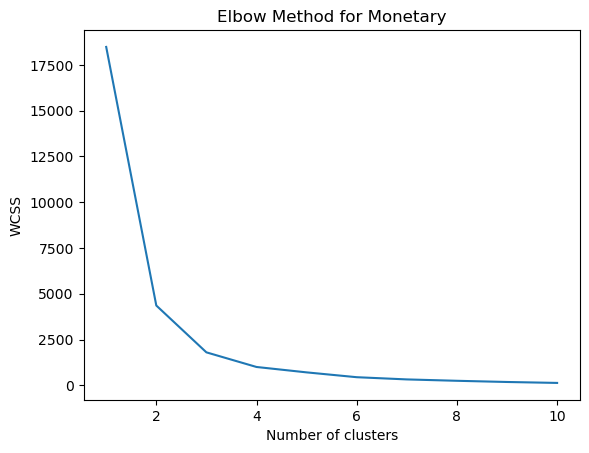

In [83]:
# Plot the Elbow Method for Monetary
plt.plot(range(1, 11), wcss_m)
plt.title('Elbow Method for Monetary')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# 3 is the optimal cluster number

In [90]:
# Apply K-Means clustering for each column using the optimal number of clusters
kmeans_r = KMeans(n_clusters=3, random_state=42)
rfm['Recency_Cluster'] = kmeans_r.fit_predict(rfm[['Recency_scaled']])

kmeans_f = KMeans(n_clusters=3, random_state=42)
rfm['Frequency_Cluster'] = kmeans_f.fit_predict(rfm[['Frequency_scaled']])

kmeans_m = KMeans(n_clusters=3, random_state=42)
rfm['Monetary_Cluster'] = kmeans_m.fit_predict(rfm[['Monetary_scaled']])

# Combine the scores into a single RFM score
rfm['RFM_Score'] = rfm['Recency_Cluster'].astype('string')+rfm['Frequency_Cluster'].astype('string')+rfm['Monetary_Cluster'].astype('string')

# Show the results
rfm

C:\Users\fpt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fpt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fpt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerKey,recency,frequency,monetary,Recency_scaled,Frequency_scaled,Monetary_scaled,Recency_Cluster,Frequency_Cluster,Monetary_Cluster,RFM_Score
0,11000,1446,3,8248.9900,0.551579,1.406633,3.135647,1,0,1,101
1,11001,1225,3,6383.8800,-0.965860,1.406633,2.257607,0,0,1,001
2,11002,1515,3,8114.0400,1.025349,1.406633,3.072117,1,0,1,101
3,11003,1439,3,8139.2900,0.503515,1.406633,3.084003,1,0,1,101
4,11004,1448,3,8196.0100,0.565311,1.406633,3.110706,1,0,1,101
...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,1687,1,2049.0982,2.206343,-0.461466,0.216917,1,1,2,112
18480,29480,1371,1,2442.0300,0.036611,-0.461466,0.401898,1,1,2,112
18481,29481,2075,1,3374.9900,4.870444,-0.461466,0.841108,2,1,2,212
18482,29482,1673,1,2049.0982,2.110215,-0.461466,0.216917,1,1,2,112
